# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="span5 alert alert-info">
<b>    
Business request:
</b>    
</div>

**Predict destination country of a new user**

****

<div class="span5 alert alert-info">
<b>    
Overview of data:
</b>    
</div>

**Destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found,no booking),and 'other'.** 

**All users are from USA.**

**The training and test sets are split by dates.** 

**In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted).** 

**In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.** 

****

<div class="span5 alert alert-info">
<b>    
Datasets:
</b>    
</div>

**train_users.csv** 

**test_users.csv**

**sessions.csv**

**countries.csv**

**age_gender_bkts.csv**

**sample_submission.csv**

****

**Train data**

In [331]:
df_train = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/train_users_2.csv",encoding = "ISO-8859-1",na_values=['-unknown-',"NA",'-'])

In [332]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [333]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [279]:
#Transformation to datetime

df_train['timestamp_first_active'] = df_train['timestamp_first_active'].astype(str)

df_train['timestamp_first_active'] = df_train['timestamp_first_active'].apply(lambda s: s[:4] + '-' + s[4:-8] + "-" + s[6:-6] + ' ' + s[8:-4] + ':' + s[10:-2] + ":" +s[12:])
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'])

df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])


In [280]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


**Keeping data for 2014 and later as we have session data ahead of 2014**

In [281]:
df_train = df_train[(df_train['date_account_created'] > '2014-01-01') | (df_train['date_first_booking'] > '2014-01-01')]

In [282]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 422 to 213450
Data columns (total 16 columns):
id                         81264 non-null object
date_account_created       81264 non-null datetime64[ns]
timestamp_first_active     81264 non-null datetime64[ns]
date_first_booking         34142 non-null datetime64[ns]
gender                     40351 non-null object
age                        46619 non-null float64
signup_method              81264 non-null object
signup_flow                81264 non-null int64
language                   81264 non-null object
affiliate_channel          81264 non-null object
affiliate_provider         81264 non-null object
first_affiliate_tracked    80474 non-null object
signup_app                 81264 non-null object
first_device_type          81264 non-null object
first_browser              66947 non-null object
country_destination        81264 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(11)
memory usage: 10.5+ 

****

**Session data**

In [283]:
df_sessions = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/sessions.csv",encoding = "ISO-8859-1",na_values=['-unknown-',"NA",'-'])

In [284]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [285]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [224]:
#categorising less frequent 'action' to 'Others' 

In [286]:
df_sessions['action'] = df_sessions['action'].mask(df_sessions['action'].map(df_sessions['action'].value_counts()) < 24000,'Others')

In [226]:
#grouping 

In [287]:
df_sessions_grp = df_sessions.groupby(['user_id','action']).agg({'secs_elapsed':'mean'}).reset_index()

In [288]:
df_sessions_grp.head()

,user_id,action,secs_elapsed
0,00023iyk9l,Others,0.0
1,00023iyk9l,ajax_refresh_subtotal,723.5
2,00023iyk9l,confirm_email,567165.0
3,00023iyk9l,dashboard,1115.5
4,00023iyk9l,header_userpic,1599.0


In [289]:
df_sessions_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429842 entries, 0 to 1429841
Data columns (total 3 columns):
user_id         1429842 non-null object
action          1429842 non-null object
secs_elapsed    1359218 non-null float64
dtypes: float64(1), object(2)
memory usage: 32.7+ MB


In [230]:
# pivoting

In [290]:
df_sessions_expanded = df_sessions_grp.pivot(index='user_id', columns='action', values='secs_elapsed').reset_index()

In [291]:
df_sessions_expanded.columns

Index(['user_id', 'Others', 'active', 'ajax_check_dates', 'ajax_lwlb_contact',
       'ajax_photo_widget_form_iframe', 'ajax_refresh_subtotal',
       'ask_question', 'authenticate', 'calendar_tab_inner2', 'campaigns',
       'click', 'collections', 'complete_status', 'confirm_email', 'create',
       'dashboard', 'edit', 'edit_verification', 'header_userpic', 'identity',
       'impressions', 'index', 'listings', 'lookup', 'manage_listing',
       'notifications', 'other_hosting_reviews_first', 'personalize', 'qt2',
       'recommendations', 'requested', 'reviews', 'search', 'search_results',
       'show', 'show_personalize', 'similar_listings', 'similar_listings_v2',
       'social_connections', 'track_page_view', 'travel_plans_current',
       'unavailabilities', 'update'],
      dtype='object', name='action')

In [233]:
#joining session and train

In [292]:
df_train_join = df_train.join(df_sessions_expanded.set_index('user_id'), on='id')

In [293]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 422 to 213450
Data columns (total 59 columns):
id                               81264 non-null object
date_account_created             81264 non-null datetime64[ns]
timestamp_first_active           81264 non-null datetime64[ns]
date_first_booking               34142 non-null datetime64[ns]
gender                           40351 non-null object
age                              46619 non-null float64
signup_method                    81264 non-null object
signup_flow                      81264 non-null int64
language                         81264 non-null object
affiliate_channel                81264 non-null object
affiliate_provider               81264 non-null object
first_affiliate_tracked          80474 non-null object
signup_app                       81264 non-null object
first_device_type                81264 non-null object
first_browser                    66947 non-null object
country_destination              81264 

In [429]:
#replacing outliers with mean age
mean_age = df_train_join[df_train_join['age']<=100].age.mean()
df_train_join.loc[(df_train_join['age']>100),'age'] = mean_age


In [430]:
df_train_join.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,similar_listings_v2,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination
422,oamfblpxdy,2014-01-15,2010-04-17 17:26:59,2014-01-15,OTHER,45.0,basic,24,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
710,5p0nmf3r6i,2014-05-23,2010-05-28 14:06:42,NaT,FEMALE,39.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
1025,dlg3a9x97v,2014-04-03,2010-07-12 21:29:24,NaT,MALE,47.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
2537,m1x72dgnnk,2013-08-22,2010-12-01 14:30:12,2014-07-30,FEMALE,38.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
4180,p4oev43bwu,2014-02-11,2011-04-12 02:54:20,2014-02-14,NaN,27.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
4434,r6mv11jano,2014-01-29,2011-04-24 11:19:01,2014-03-17,NaN,26.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,7730.724,es,92.25,ES
4485,f3dnhnzzsq,2014-06-17,2011-04-26 23:20:29,2014-06-22,FEMALE,28.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US
7666,to4mnzr2sq,2014-05-29,2011-08-15 22:54:48,NaT,MALE,28.0,basic,25,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
12279,836nc10vsc,2014-02-23,2011-11-08 21:10:42,NaT,NaN,NaN,basic,0,en,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
15393,i20tndjswt,2014-06-17,2012-01-17 19:04:02,2014-07-18,MALE,28.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,en,0.00,US


****

**Countries data**

In [296]:
df_countries = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/countries.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [297]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null int64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 688.0+ bytes


In [298]:
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06


In [299]:
df_countries['destination_language'] = df_countries['destination_language'].map({'eng':'en','deu':'de',
                                                                                 'spa':'es','fra':'fr','nld':'nl',
                                                                                 'por': 'pt','ita':'it'})
                                                                    

In [300]:
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,en,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,en,0.00
2,DE,51.165707,10.452764,7879.5680,357022,de,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,es,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fr,92.06


Text(0, 0.5, 'language_levenshtein_distance')

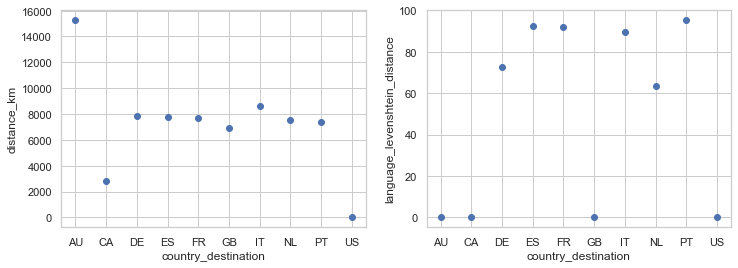

In [301]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(df_countries['country_destination'],df_countries['distance_km'],'o')
plt.xlabel("country_destination")
plt.ylabel("distance_km from US")


plt.subplot(1, 2, 2)
plt.plot(df_countries['country_destination'],df_countries['language_levenshtein_distance'],'o')
plt.xlabel("country_destination")
plt.ylabel("language_levenshtein_distance")


**AU looks farest from US**

**ES, FR, PT have highest language_levenshtein_distance i.e these languages have highest difference score from US english.**

In [243]:
#dropping data from countries and joining with train data

In [302]:
df_countries_ = df_countries[['country_destination','distance_km','destination_language','language_levenshtein_distance']] 

In [303]:
df_train_join = df_train_join.join(df_countries_.set_index('country_destination'), on='country_destination')

In [315]:
target_col_at_end = ['country_destination']
    
df_train_join = df_train_join[[c for c in df_train_join if c not in target_col_at_end] 
    + [c for c in target_col_at_end if c in df_train_join]]

In [318]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 422 to 213450
Data columns (total 62 columns):
id                               81264 non-null object
date_account_created             81264 non-null datetime64[ns]
timestamp_first_active           81264 non-null datetime64[ns]
date_first_booking               34142 non-null datetime64[ns]
gender                           40351 non-null object
age                              46619 non-null float64
signup_method                    81264 non-null object
signup_flow                      81264 non-null int64
language                         81264 non-null object
affiliate_channel                81264 non-null object
affiliate_provider               81264 non-null object
first_affiliate_tracked          80474 non-null object
signup_app                       81264 non-null object
first_device_type                81264 non-null object
first_browser                    66947 non-null object
Others                           48529 

In [317]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,similar_listings_v2,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination
422,oamfblpxdy,2014-01-15,2010-04-17 17:26:59,2014-01-15,OTHER,45.0,basic,24,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US
710,5p0nmf3r6i,2014-05-23,2010-05-28 14:06:42,NaT,FEMALE,39.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
1025,dlg3a9x97v,2014-04-03,2010-07-12 21:29:24,NaT,MALE,47.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
2537,m1x72dgnnk,2013-08-22,2010-12-01 14:30:12,2014-07-30,FEMALE,38.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US
4180,p4oev43bwu,2014-02-11,2011-04-12 02:54:20,2014-02-14,NaN,27.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US


****

**Gender data**

In [305]:
df_gender = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [306]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [307]:
df_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


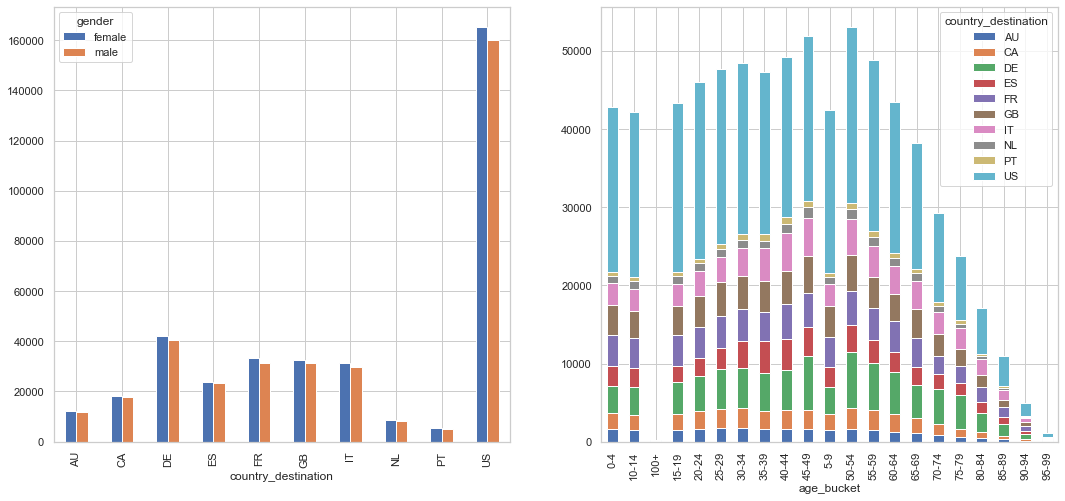

In [308]:
fig, (ax, ax2) = plt.subplots(figsize=(18,8),ncols=2)

df_gender.groupby(['country_destination','gender'])['population_in_thousands'].agg('sum').unstack().plot(kind='bar',ax=ax)

pd.pivot_table(df_gender, values="population_in_thousands", index="age_bucket", columns="country_destination", aggfunc=np.sum).plot.bar(stacked=True,ax=ax2)

**US seem to have highest population, also male population is higher compared to female for all destination countries.** 

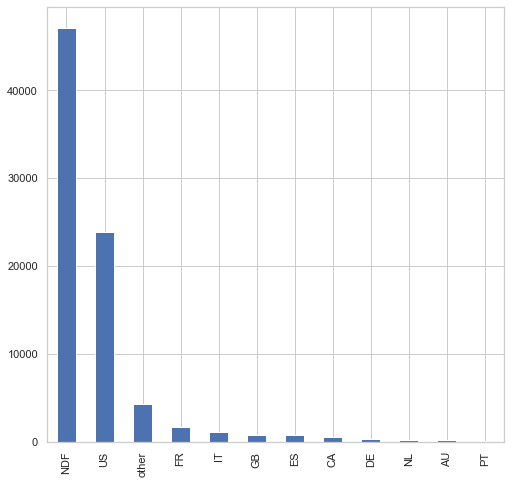

In [337]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)

cat_counts = df_train_join["country_destination"].value_counts()
cat_counts.plot.bar()

**Most of the users land up doing no bookings.**

**US is the destination country for most of the users, could be because all user data are from people of US which also implies that most users do bookings within the country.** 

**Dataset seem imbalanced with NDF and US contributing max to the data** 

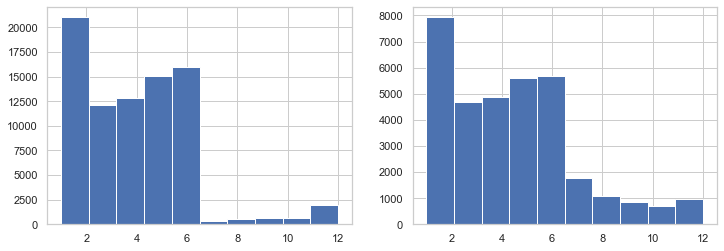

In [360]:
fig, (ax, ax2) = plt.subplots(figsize=(12,4),ncols=2)

df_train_join['date_account_created'].dt.month.hist(ax=ax)

df_train_join['date_first_booking'].dt.month.hist(ax=ax2)

**First half of the year has the max accounts created and first bookings**

**January has highest accounts created and first bookings**

In [365]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,similar_listings_v2,social_connections,track_page_view,travel_plans_current,unavailabilities,update,distance_km,destination_language,language_levenshtein_distance,country_destination
422,oamfblpxdy,2014-01-15,2010-04-17 17:26:59,2014-01-15,OTHER,45.0,basic,24,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US
710,5p0nmf3r6i,2014-05-23,2010-05-28 14:06:42,NaT,FEMALE,39.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
1025,dlg3a9x97v,2014-04-03,2010-07-12 21:29:24,NaT,MALE,47.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDF
2537,m1x72dgnnk,2013-08-22,2010-12-01 14:30:12,2014-07-30,FEMALE,38.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US
4180,p4oev43bwu,2014-02-11,2011-04-12 02:54:20,2014-02-14,NaN,27.0,basic,0,en,sem-brand,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,en,0.0,US


In [391]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 422 to 213450
Data columns (total 62 columns):
id                               81264 non-null object
date_account_created             81264 non-null datetime64[ns]
timestamp_first_active           81264 non-null datetime64[ns]
date_first_booking               34142 non-null datetime64[ns]
gender                           40351 non-null object
age                              46619 non-null float64
signup_method                    81264 non-null object
signup_flow                      81264 non-null int64
language                         81264 non-null object
affiliate_channel                81264 non-null object
affiliate_provider               81264 non-null object
first_affiliate_tracked          80474 non-null object
signup_app                       81264 non-null object
first_device_type                81264 non-null object
first_browser                    66947 non-null object
Others                           48529 